 The best solution found:                                                                           
 [-1. -1.  1.  1.  0.  1. -1. -1. -1.  0.]

 Objective function:
 91.78021634680157


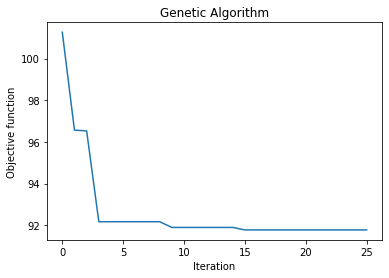

It took 1628.0113787651062 seconds!


In [3]:
# 10 Gene Network, 10 indices unknown

import numpy
import numpy as np
from itertools import product
import pickle
from scipy.stats import norm
import pickle
import random

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF

from AFs import knowledge_gradient, expected_improvement, probability_of_improvement, maxvalue_entropy_search, upper_confidence_bound

from time import time

from geneticalgorithm import geneticalgorithm as ga

# # Generating Connectivity Matrix
#
# combs = product(range(3), repeat=10)
# Combinations = numpy.array(list(combs))-1
#
# ConnectivitySpace = numpy.zeros((59049, 10*10))
#
OptimalC = np.array(np.mat('+1 -1 -1 0 0 0 0 0 0 0;'
                           '0 0 0 -1 -1 -1 0 0 0 0;'
                           '0 +1 +1 +1 +1 0 0 +1 0 0;'
                           '0 0 0 0 +1 +1 0 0 0 0;'
                           '0 -1 -1 0 -1 0 0 0 0 0;'
                           '0 -1 -1 -1 -1 +1 0 -1 +1 0;'
                           '0 0 0 0 0 -1 0 +1 +1 -1;'
                           '0 0 0 0 0 -1 -1 0 -1 -1;'
                           '0 0 0 0 0 -1 0 0 +1 0;'
                           '0 -1 -1 -1 0 0 +1 -1 +1 0').T) # true #Transpose!!!!

OptimalCVector = numpy.reshape(OptimalC,(1,10*10))
#
# # for i in range(59049):
# #
# #         temp = OptimalCVector
# #
# #         temp[0, (2 - 1) * 10 + 1 - 1] = Combinations[i, 0]
# #         temp[0, (4 - 1) * 10 + 2 - 1] = Combinations[i, 1]
# #         temp[0, (8 - 1) * 10 + 3 - 1] = Combinations[i, 2]
# #         temp[0, (5 - 1) * 10 + 4 - 1] = Combinations[i, 3]
# #         temp[0, (3 - 1) * 10 + 5 - 1] = Combinations[i, 4]
# #         temp[0, (9 - 1) * 10 + 6 - 1] = Combinations[i, 5]
# #         temp[0, (6 - 1) * 10 + 7 - 1] = Combinations[i, 6]
# #         temp[0, (9 - 1) * 10 + 8 - 1] = Combinations[i, 7]
# #         temp[0, (6 - 1) * 10 + 9 - 1] = Combinations[i, 8]
# #         temp[0, (3 - 1) * 10 + 10 - 1] = Combinations[i, 9]
# #
# #         ConnectivitySpace[i,:] = temp
#
#
# ConnectivitySpace[0,:] = OptimalCVector

# #Generating x
# dim = 100
# number_of_states = 10
# x = np.array(np.zeros((number_of_states, dim)).T)
# # initial x0
# x[0, :] = np.array([0, 0, 1, 0, 1, 1, 0, 0, 1, 1])


# for i in range(dim-1):
#     xtemp = np.atleast_2d(x[i, :])
#     b = np.random.binomial(1, 0.3, size=(1, number_of_states))  # it works but numpy website says update with new code
#     x[i+1, :] = (np.matmul(xtemp, (OptimalC.T)) > 0)
#     x[i+1, :] = 1 * np.logical_xor(x[i+1, :], b) # *1 is for converting bool to int

# # Saving the objects:
# with open('OBSGRNVals10GeneB31100Samples.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
#     pickle.dump(x, f)

# #Saving the objects:
# with open('BOValsNewGRN2.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
#     pickle.dump(ConnectivitySpace, f)

start = time()

with open('BOValsNewGRN2.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    ConnectivitySpace = pickle.load(f)

with open('OBSGRNVals10GeneB11100Samples.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    x = pickle.load(f)
    
with open('50MissingData4GeneB52100Samples.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    MissingData = pickle.load(f)

# Generate A

combs = product(range(2), repeat=10)

combs = list(combs)

A = numpy.array(combs)

Pvalue = 0.1
dna_dsb = np.array(np.mat('0 0 0 0 0 0 0 0 0 0'))
myscale = 50
xycount = 100
    
def FuncEval(GAConnectivityChoice):
    
    twoDGAConnectivityChoice = np.atleast_2d(GAConnectivityChoice)

    dna_dsb = np.array(np.mat('0 0 0 0 0 0 0 0 0 0'))

    temp = OptimalCVector

    temp[0, (2 - 1) * 10 + 1 - 1] = twoDGAConnectivityChoice[0, 0]
    temp[0, (4 - 1) * 10 + 2 - 1] = twoDGAConnectivityChoice[0, 1]
    temp[0, (8 - 1) * 10 + 3 - 1] = twoDGAConnectivityChoice[0, 2]
    temp[0, (5 - 1) * 10 + 4 - 1] = twoDGAConnectivityChoice[0, 3]
    temp[0, (3 - 1) * 10 + 5 - 1] = twoDGAConnectivityChoice[0, 4]
    temp[0, (9 - 1) * 10 + 6 - 1] = twoDGAConnectivityChoice[0, 5]
    temp[0, (6 - 1) * 10 + 7 - 1] = twoDGAConnectivityChoice[0, 6]
    temp[0, (9 - 1) * 10 + 8 - 1] = twoDGAConnectivityChoice[0, 7]
    temp[0, (6 - 1) * 10 + 9 - 1] = twoDGAConnectivityChoice[0, 8]
    temp[0, (3 - 1) * 10 + 10 - 1] = twoDGAConnectivityChoice[0, 9]


    randomC = np.reshape(temp, (10, 10))

    # Generate M

    posterior = (1 / 1024) * np.ones((1, 1024))

    M = np.array(np.zeros((1024, 1024)).T)

    combs = product(range(2), repeat=10)

    numcombs = numpy.array(list(combs))

    xnew2 = np.array(np.zeros((10, 1)).T)

    for i in range(1024):
        xtemp = np.atleast_2d(numcombs[i, :])
        xnew2 = 1 * (np.matmul(xtemp, (randomC).T + dna_dsb) > 0)
        # print (xnew2)
        for t in range(1024):

            xtemp2 = np.atleast_2d(numcombs[t, :])

            M[t, i] = 1

            for k in range(10):

                if xtemp2[0, k] == xnew2[0, k]:
                    temp1 = 1 - Pvalue
                else:
                    temp1 = Pvalue

                M[t, i] = M[t, i] * temp1

    missflag = 0
    LogMarginal = 0

    for i in range(xycount):

        if i in MissingData:

            pred_posterior = np.matmul(posterior,M.T)
            #pred_posterior = pred_posterior / np.sum(pred_posterior)
            #print(np.sum(pred_posterior))
            # newstate = (newstate) / (np.sum(newstate))
            posterior = pred_posterior
            #print(np.sum(posterior))

        else:

            itemindex = np.array((A == x[i, :]).all(axis=1).nonzero())

            #LogMarginalTrain = LogMarginalTrain + np.log10(pred_posterior[0, itemindex])
            pred_posterior = np.matmul(posterior, M.T)
            #pred_posterior = pred_posterior/np.sum(pred_posterior)
            #print(np.sum(pred_posterior))
            # newstate = (newstate) / (np.sum(newstate))
            LogMarginal = LogMarginal + np.log10(pred_posterior[0, itemindex])
            # missflag = 0

            posterior = numpy.zeros((1,1024))
            posterior[0, itemindex] = 1


    return (-1) * LogMarginal

start = time()

# 40, 10

algorithm_param = {'max_num_iteration':25,\
                   'population_size':10,\
                   'mutation_probability':0.1,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}


varbound = np.array([[-1, 1]] * 10)

model = ga(function=FuncEval, dimension=10, variable_type='int', variable_boundaries=varbound, algorithm_parameters=algorithm_param)

model.funtimeout = 350

model.run()

BestC = model.best_variable #solution.get('variable')
BestLML = model.best_function
LMLReport = model.report

#CTrain = np.vstack((CTrain, Cnext)) #vstack

#Saving the objects:
with open('10Gene10UnknownB11100Samples50MissingOnlyGAV10.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([BestC, BestLML, LMLReport], f)

end = time()
print(f'It took {end - start} seconds!')
